In [1]:
#1
from pandas import read_csv, concat
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from numpy import zeros, argmax, array_split
from sklearn.metrics import classification_report, confusion_matrix
from preprocess import PreProcessor
from vectorization import VectorStore
from models import ModelStore
from seaborn import heatmap

In [2]:
#2
liar_train_dir = '../Data/LIAR/train.tsv'
liar_test_dir = '../Data/LIAR/test.tsv'
liar_valid_dir = '../Data/LIAR/valid.tsv'

In [3]:
#3
liar_train = read_csv(liar_train_dir, sep = '\t')
liar_test = read_csv(liar_test_dir, sep = '\t')
liar_valid = read_csv(liar_valid_dir, sep = '\t')

In [4]:
#4
liar_train.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker-job', 'state', 'party', 'barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'context']
liar_test.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker-job', 'state', 'party', 'barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'context']
liar_valid.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker-job', 'state', 'party', 'barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'context']

In [5]:
#5
train_samples, train_labels = liar_train['statement'], liar_train['label']
test_samples, test_labels = liar_test['statement'], liar_test['label']
valid_samples, valid_labels = liar_valid['statement'], liar_valid['label']

In [6]:
#6
samples = concat([train_samples, test_samples, valid_samples])
labels = concat([train_labels, test_labels, valid_labels])

Text(0, 0.5, 'Number of Sentences')

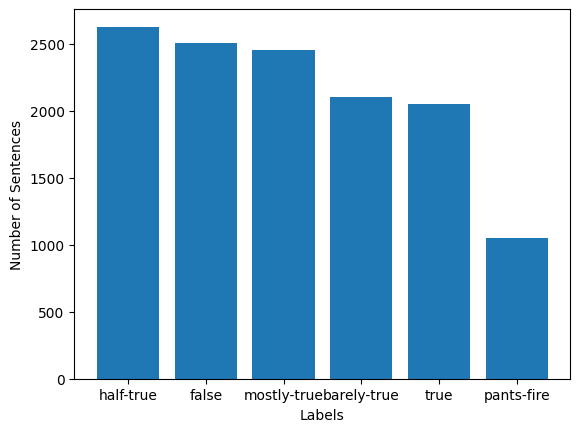

In [7]:
#7

x = ["half-true", "false", "mostly-true", "barely-true", "true", "pants-fire"]
y = [2627, 2506, 2454, 2102, 2052, 1047]
fig = pyplot.figure()
pyplot.bar(x, y)
pyplot.xlabel("Labels")
pyplot.ylabel("Number of Sentences")

In [ ]:
# pyplot.show()

In [ ]:
# image_format = 'eps'
# image_name = 'Sentence Length Distributions.eps'

In [ ]:
# fig.savefig(image_name, format = image_format, dpi = 500)

In [8]:
#8
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)
labels = np_utils.to_categorical(labels)

In [9]:
#9
encoder.classes_

array(['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire',
       'true'], dtype=object)

In [10]:
#10
preprocessor = PreProcessor()
vector_store = VectorStore()
model_store = ModelStore()

In [11]:
#11
samples = samples.apply(preprocessor.deep_preprocess)

In [12]:
#12
vectors, samples = vector_store.get_w2v_vectors(samples)

In [ ]:
fig = pyplot.figure()
pyplot.hist([len(sample) for sample in samples], bins = 100, range = [0, 50])
pyplot.xlabel('\nlength of sentence\n')
pyplot.ylabel('\nnumber of sentences\n')
pyplot.show()

In [ ]:
image_format = 'eps'
image_name = 'Sentence Length Distributions.eps'
fig.savefig(image_name, format = image_format, dpi = 500)

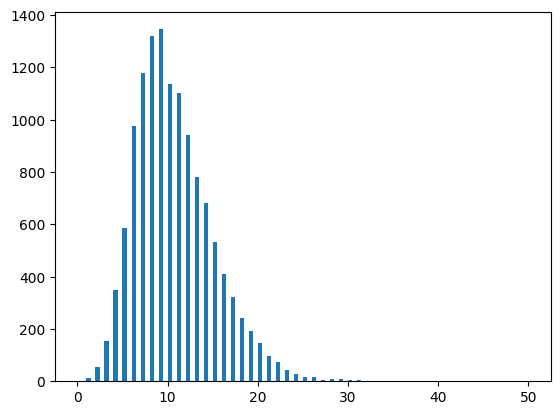

Maximum length of the sentence: 30


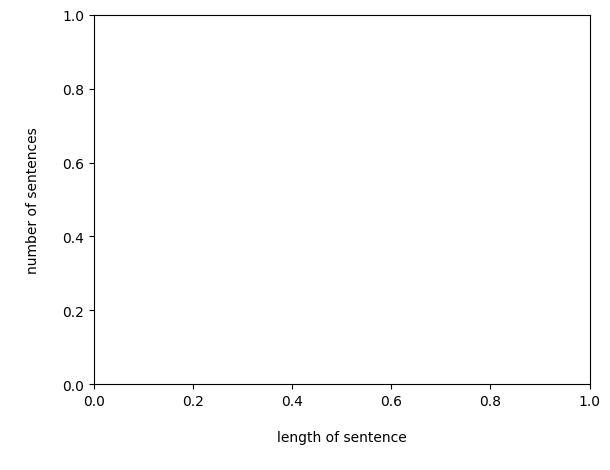

In [13]:
#13
samples = preprocessor.pad(samples)

In [14]:
#12
samples = array_split(samples, [10239, 11505, 12788])
labels = array_split(labels, [10239, 11505, 12788])

train_samples = samples[0]
test_samples = samples[1]
valid_samples = samples[2]

train_labels = labels[0]
test_labels = labels[1]
valid_labels = labels[2]

In [15]:
#13
testVal = zeros((test_labels.shape[0], 1))
for i in range(test_labels.shape[0]):
    testVal[i] = int(argmax(test_labels[i]))

In [18]:
model_names = ['Dense NN', 'Single LSTM NN', 'Single Bi-LSTM NN', 'CONV + Dense NN', 'CONV + Single LSTM NN', 'CONV + Single Bi-LSTM NN']
formats = ['png', 'jpg', 'pdf', 'svg', 'eps']
logs = {}
reports = {}
preds = {}

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 300)           3310200   
                                                                 
 dense_8 (Dense)             (None, 30, 16)            4816      
                                                                 
 flatten_2 (Flatten)         (None, 480)               0         
                                                                 
 dropout_6 (Dropout)         (None, 480)               0         
                                                                 
 dense_9 (Dense)             (None, 6)                 2886      
                                                                 
Total params: 3,317,902
Trainable params: 7,702
Non-trainable params: 3,310,200
_________________________________________________________________
Epoch 1/5
683/683 - 4s - loss: 1.7528 - 

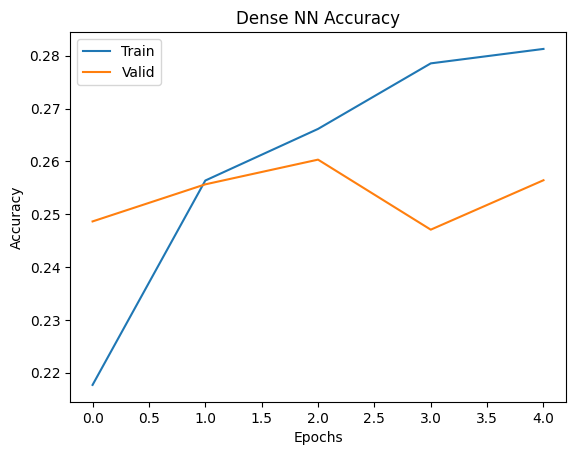

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


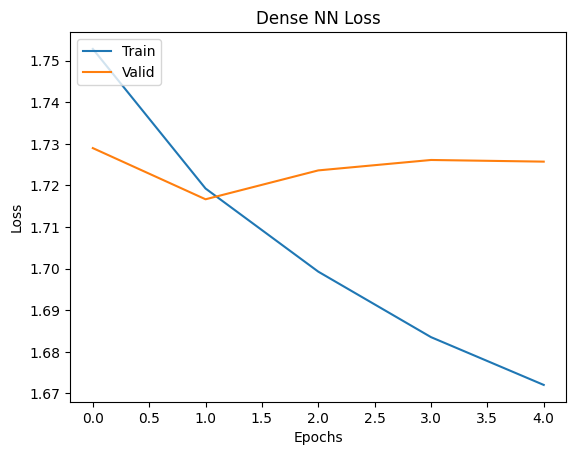

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.20      0.11      0.14       212
         1.0       0.25      0.48      0.33       249
         2.0       0.21      0.16      0.18       265
         3.0       0.28      0.41      0.33       241
         4.0       0.22      0.12      0.15        92
         5.0       0.23      0.07      0.10       207

    accuracy                           0.25      1266
   macro avg       0.23      0.23      0.21      1266
weighted avg       0.24      0.25      0.22      1266



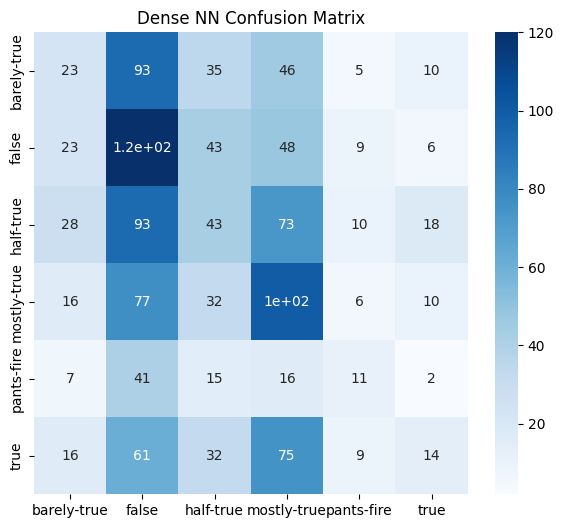

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 30, 300)           3310200   
                                                                 
 lstm_4 (LSTM)               (None, 10)                12440     
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
Total params: 3,322,706
Trainable params: 12,506
Non-trainable params: 3,310,200
_________________________________________________________________
Epoch 1/5
683/683 - 17s - loss: 1.7528 - accuracy: 0.2051 - val_loss: 1.7402 - val_accuracy: 0.2237 - 17s/epoch - 25ms/step
Epoch 2/5
683/683 - 12s - loss: 1.7305 - accura

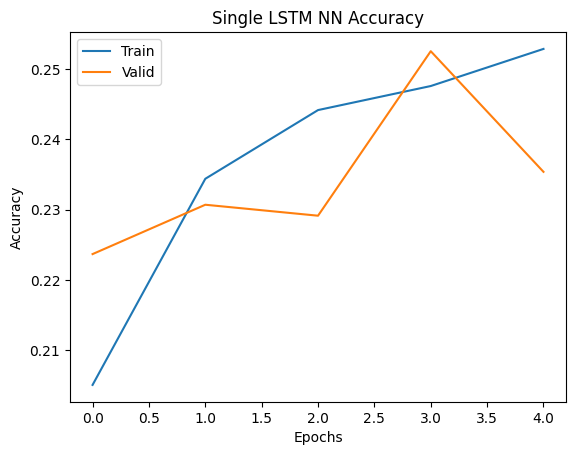

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


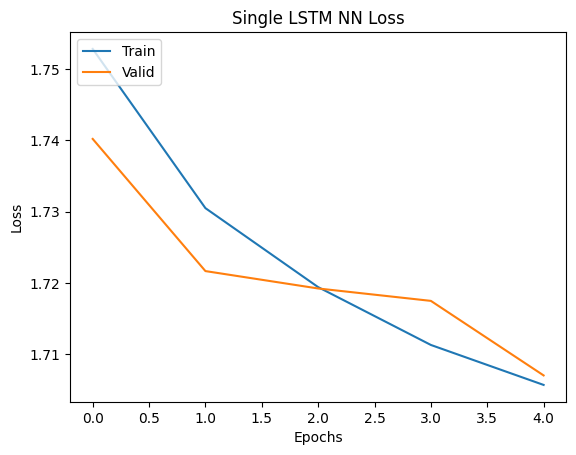

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

         0.0       0.28      0.10      0.15       212
         1.0       0.24      0.44      0.31       249
         2.0       0.25      0.48      0.33       265
         3.0       0.27      0.22      0.24       241
         4.0       0.67      0.02      0.04        92
         5.0       0.21      0.02      0.04       207

    accuracy                           0.25      1266
   macro avg       0.32      0.21      0.18      1266
weighted avg       0.28      0.25      0.21      1266



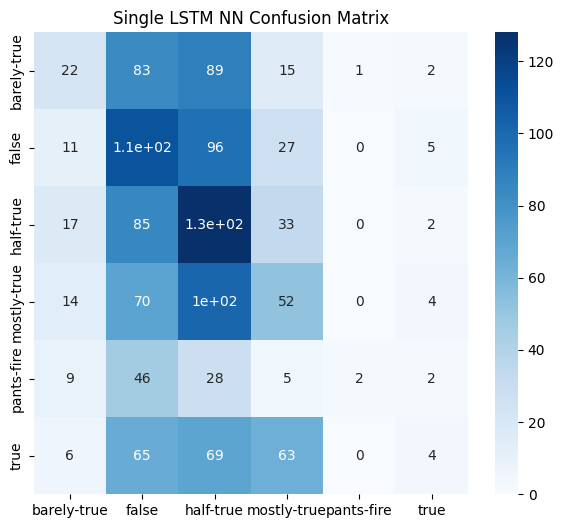

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 300)           3310200   
                                                                 
 bidirectional_2 (Bidirectio  (None, 20)               24880     
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 6)                 126       
                                                                 
Total params: 3,335,206
Trainable params: 25,006
Non-trainable params: 3,310,200
_________________________________________________________________
Epoch 1/5
683/683 - 23s - loss: 1.7462 - accuracy: 0.2190 - val_loss: 1.7243 - val_accuracy: 0.2432 - 23s

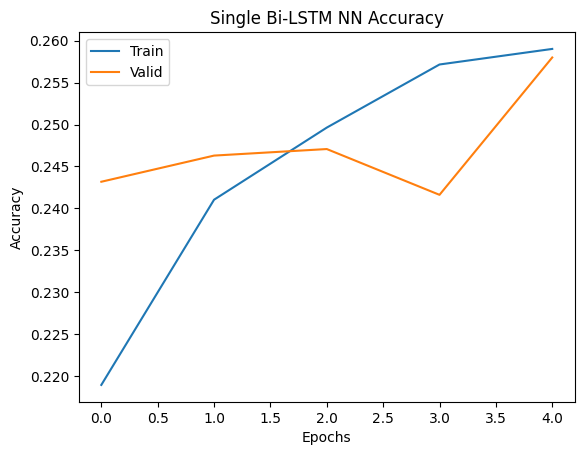

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


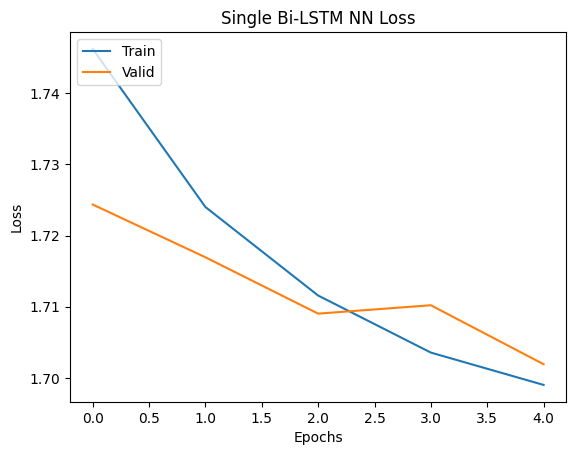

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

         0.0       0.30      0.20      0.24       212
         1.0       0.23      0.51      0.32       249
         2.0       0.27      0.22      0.24       265
         3.0       0.26      0.29      0.27       241
         4.0       0.13      0.02      0.04        92
         5.0       0.25      0.10      0.14       207

    accuracy                           0.25      1266
   macro avg       0.24      0.22      0.21      1266
weighted avg       0.25      0.25      0.23      1266



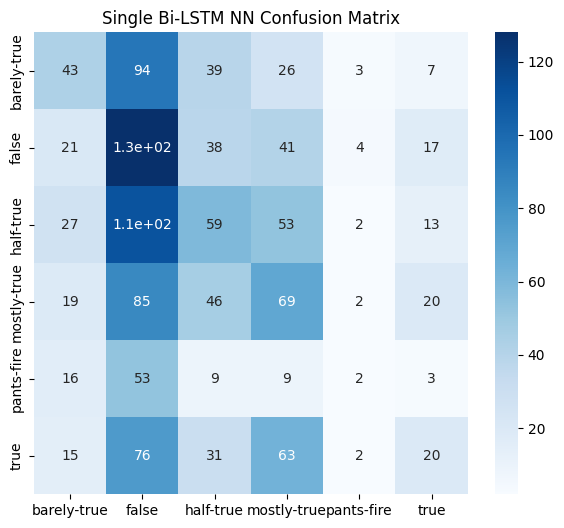

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 30, 300)           3310200   
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 128)           115328    
                                                                 
 average_pooling1d_3 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                19210     
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                      

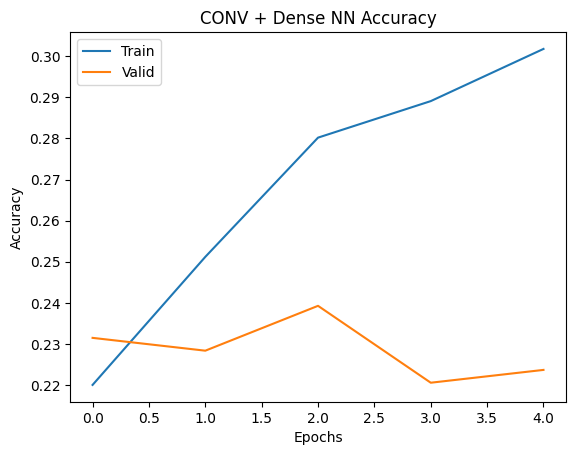

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


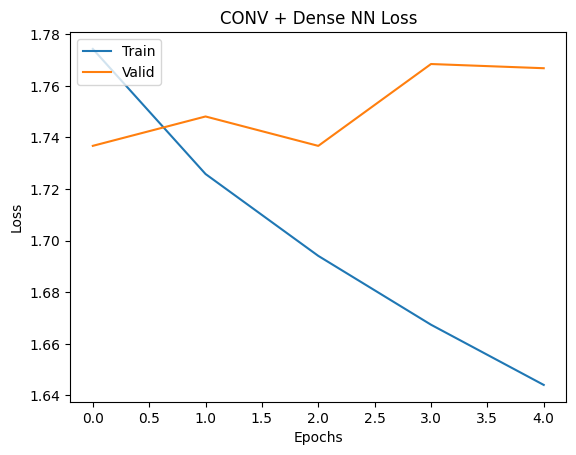

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         0.0       0.21      0.24      0.22       212
         1.0       0.28      0.33      0.30       249
         2.0       0.24      0.16      0.19       265
         3.0       0.25      0.37      0.30       241
         4.0       0.27      0.07      0.11        92
         5.0       0.21      0.18      0.20       207

    accuracy                           0.24      1266
   macro avg       0.24      0.22      0.22      1266
weighted avg       0.24      0.24      0.23      1266



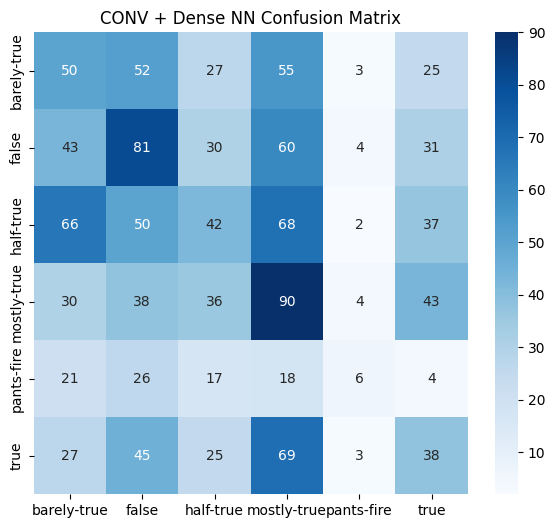

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 30, 300)           3310200   
                                                                 
 conv1d_4 (Conv1D)           (None, 30, 128)           115328    
                                                                 
 average_pooling1d_4 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 10)                5560      
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 6)                 66        
                                                     

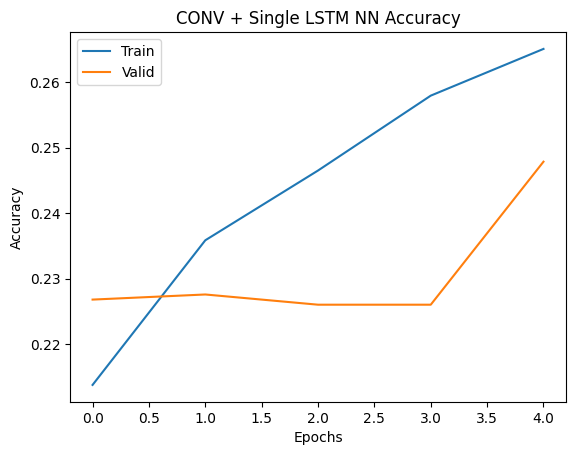

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


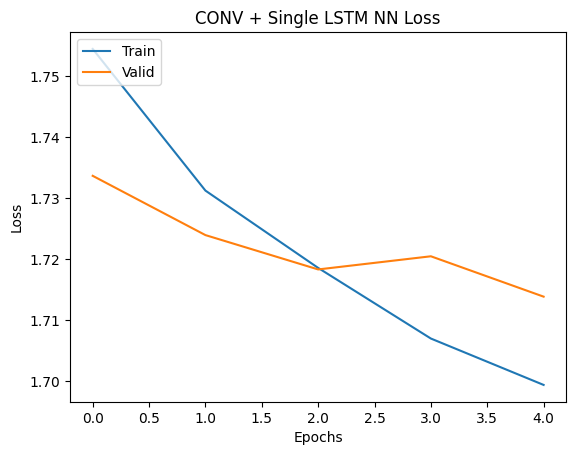

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         0.0       0.25      0.09      0.13       212
         1.0       0.24      0.47      0.32       249
         2.0       0.25      0.31      0.28       265
         3.0       0.28      0.37      0.32       241
         4.0       0.25      0.01      0.02        92
         5.0       0.21      0.06      0.10       207

    accuracy                           0.25      1266
   macro avg       0.25      0.22      0.20      1266
weighted avg       0.25      0.25      0.22      1266



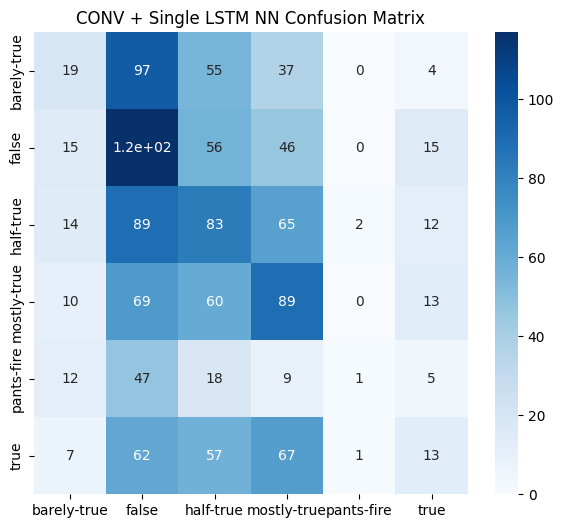

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 30, 300)           3310200   
                                                                 
 conv1d_5 (Conv1D)           (None, 30, 128)           115328    
                                                                 
 average_pooling1d_5 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 20)               11120     
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 6)               

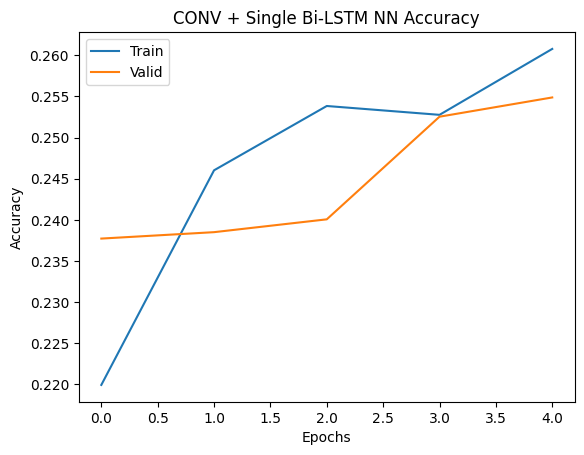

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


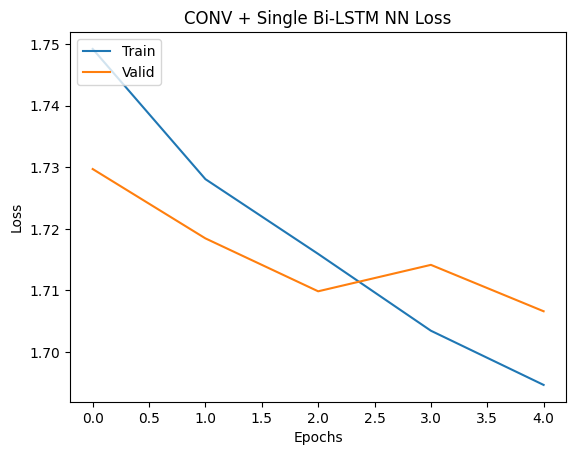

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


40/40 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

         0.0       0.25      0.27      0.26       212
         1.0       0.26      0.35      0.30       249
         2.0       0.34      0.19      0.24       265
         3.0       0.24      0.53      0.33       241
         4.0       0.00      0.00      0.00        92
         5.0       0.00      0.00      0.00       207

    accuracy                           0.26      1266
   macro avg       0.18      0.23      0.19      1266
weighted avg       0.21      0.26      0.22      1266



C:\Users\jayks\miniconda3\envs\fnd\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayks\miniconda3\envs\fnd\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayks\miniconda3\envs\fnd\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


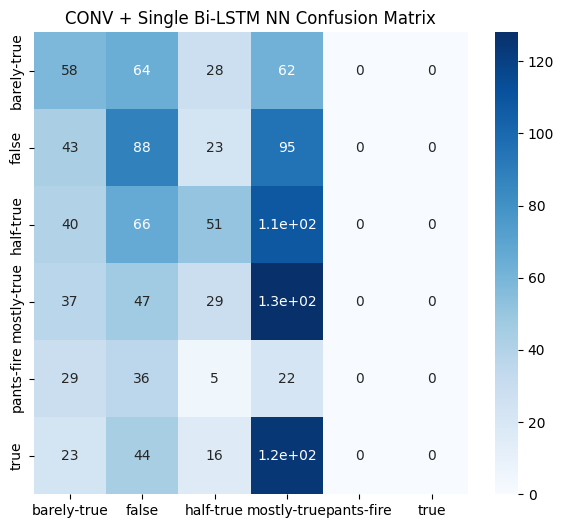

In [19]:
for name in model_names:
    
    model = model_store.get_model(name, vectors)
    model.summary()
    
    log = model.fit(
        train_samples,
        train_labels,
        validation_data = (valid_samples, valid_labels),
        batch_size = 15,
        epochs = 5,
        verbose = 2
    )
        
    fig = pyplot.figure()
    pyplot.plot(log.history['accuracy'])
    pyplot.plot(log.history['val_accuracy'])
    pyplot.title(name+' Accuracy')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')
    pyplot.legend(['Train', 'Valid'], loc = 'upper left')
    pyplot.show()
    
    for formatx in formats:
        fig.savefig(name+" Accuracy."+formatx, format = formatx, dpi = 500)
        
    fig = pyplot.figure()
    pyplot.plot(log.history['loss'])
    pyplot.plot(log.history['val_loss'])
    pyplot.title(name+' Loss')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')
    pyplot.legend(['Train', 'Valid'], loc = 'upper left')
    pyplot.show()
    
    for formatx in formats:
        fig.savefig(name+" Loss."+formatx, format = formatx, dpi = 500)
        
    logs[name] = log
    
    pred = model.predict(test_samples)
    preds[name] = pred
    
    pred_rounded = zeros((pred.shape[0], 1))
    for i in range(pred.shape[0]):
        pred_rounded[i] = int(argmax(pred[i]))
    
    reports[name] = classification_report(testVal, pred_rounded)
    print(reports[name])
    
    fig = pyplot.figure(figsize = (7, 6))
    confM = confusion_matrix(testVal, pred_rounded)
    hm = heatmap(confM, annot = True, cmap = 'Blues')
    hm.set_title(name+' Confusion Matrix')
    hm.xaxis.set_ticklabels(encoder.classes_)
    hm.yaxis.set_ticklabels(encoder.classes_)
    pyplot.show()
    
    for formatx in formats:
        fig.savefig(name+" Confusion Matrix."+formatx, format = formatx, dpi = 500)

In [ ]:
#14
model = model_store.get_fully(vectors)
model.summary()

In [ ]:
#15
log = model.fit(
    train_samples,
    train_labels,
    validation_data = (valid_samples, valid_labels),
    batch_size = 15,
    epochs = 5,
    verbose = 2
)

In [ ]:
#16
# model.save('../Models/CONVSingleBiLSTMNN.model')

In [ ]:
#17
fig = pyplot.figure()
pyplot.plot(log.history['accuracy'])
pyplot.plot(log.history['val_accuracy'])
pyplot.title('Dense NN Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(['Train', 'Valid'], loc = 'upper left')
pyplot.show()

In [ ]:
image_format = 'jpg'
image_name = 'Desne NN Accuracy.jpg'
fig.savefig(image_name, format = image_format, dpi = 500)

In [ ]:
#17
fig = pyplot.figure()
pyplot.plot(log.history['loss'])
pyplot.plot(log.history['val_loss'])
pyplot.title('Dense NN Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(['Train', 'Valid'], loc = 'upper left')
pyplot.show()

In [ ]:
image_format = 'eps'
image_name = 'Dense NN Loss.eps'
fig.savefig(image_name, format = image_format, dpi = 500)

In [ ]:
#17
pred = model.predict(test_samples)
# pred = preds['bi-lstm']

In [ ]:
#18
pred_rounded = zeros((pred.shape[0], 1))
for i in range(pred.shape[0]):
    pred_rounded[i] = int(argmax(pred[i]))

In [ ]:
#18
report = classification_report(testVal, pred_rounded)
print(report)

In [ ]:
fig = pyplot.figure(figsize = (7, 6))
confM = confusion_matrix(testVal, pred_rounded)
hm = heatmap(confM, annot = True, cmap = 'Blues')
hm.set_title("Dense NN Confusion Matrix")
hm.xaxis.set_ticklabels(encoder.classes_)
hm.yaxis.set_ticklabels(encoder.classes_)

In [ ]:
# logs = {}
# reports = {}
# preds = {}

In [ ]:
image_format = 'png'
image_name = 'xxxx.png'
fig.savefig(image_name, format = image_format, dpi = 500)